
=== Travel Planner Menu ===
1. Sort by budget + logic (loop)
2. Sort by duration + logic (recursion)
3. Search trip by city name
4. Save last sorted trips to CSV
5. Compare performance of sorting algorithms
6. Exit

Insertion Sort (Loop-based): 0.000142 seconds
Merge Sort (Recursion-based): 0.000060 seconds


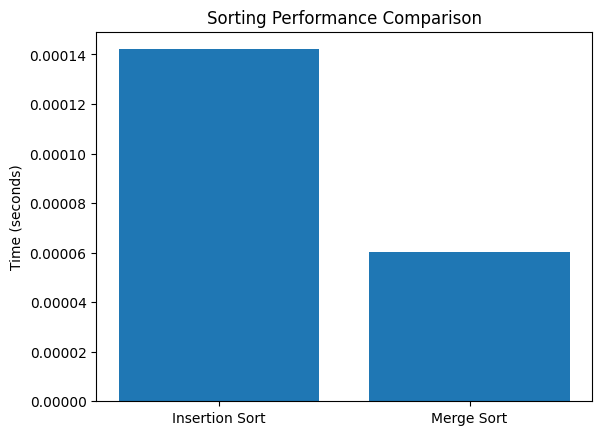


=== Travel Planner Menu ===
1. Sort by budget + logic (loop)
2. Sort by duration + logic (recursion)
3. Search trip by city name
4. Save last sorted trips to CSV
5. Compare performance of sorting algorithms
6. Exit
Goodbye!


In [67]:

import pandas as pd
import matplotlib.pyplot as plt
import time

# === Trip Class ===
class Trip:
    def __init__(self, city, budget, duration, activity, logic_expression):
        self.city = city
        self.budget = float(budget)
        self.duration = int(duration)
        self.activity = activity
        self.logic_expression = logic_expression

    def __str__(self):
        return f"{self.city} | ${self.budget} | {self.duration} days | {self.activity} | Logic: {self.logic_expression}"


# === User Class ===
class User:
    def __init__(self, max_budget=None, max_duration=None):
        self.max_budget = max_budget
        self.max_duration = max_duration


# === Truth Table Evaluator ===
class TruthTableEvaluator:
    def __init__(self, trip, user):
        self.trip = trip
        self.user = user

    def evaluate_expression(self):
        p = self.trip.budget < self.user.max_budget if self.user.max_budget is not None else True
        q = self.trip.duration < self.user.max_duration if self.user.max_duration is not None else True

        expr = self.trip.logic_expression.replace("¬", "not ").replace("∧", "and").replace("∨", "or")
        expr = expr.replace("p", str(p)).replace("q", str(q))
        expr = expr.replace("→", " or not ").replace("↔", " == ")

        try:
            return eval(expr)
        except Exception as e:
            print(f"Error evaluating expression '{self.trip.logic_expression}': {e}")
            return False


# === Planner Class (Loop-based) ===
class Planner:
    def __init__(self, trips):
        self.trips = trips

    def sort_by_budget_then_logic(self, user):
        for i in range(1, len(self.trips)):
            key_trip = self.trips[i]
            j = i - 1
            while j >= 0 and self.trips[j].budget > key_trip.budget:
                self.trips[j + 1] = self.trips[j]
                j -= 1
            self.trips[j + 1] = key_trip

        self.trips.sort(key=lambda t: not TruthTableEvaluator(t, user).evaluate_expression())

    def print_trips(self):
        for trip in self.trips:
            print(trip)


# === Recursive Planner Class (Recursion-based) ===
class RecursivePlanner(Planner):
    def merge_sort_by_duration(self, trips):
        if len(trips) <= 1:
            return trips

        mid = len(trips) // 2
        left = self.merge_sort_by_duration(trips[:mid])
        right = self.merge_sort_by_duration(trips[mid:])
        return self._merge(left, right)

    def _merge(self, left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i].duration <= right[j].duration:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result.extend(left[i:])
        result.extend(right[j:])
        return result

    def sort_by_duration_then_logic(self, user):
        self.trips = self.merge_sort_by_duration(self.trips)
        self.trips.sort(key=lambda t: not TruthTableEvaluator(t, user).evaluate_expression())


# === Menu System ===
def main_menu(trips, user):
    planner = Planner(trips.copy())
    recursive_planner = RecursivePlanner(trips.copy())
    last_sorted = []

    while True:
        print("\n=== Travel Planner Menu ===")
        print("1. Sort by budget + logic (loop)")
        print("2. Sort by duration + logic (recursion)")
        print("3. Search trip by city name")
        print("4. Save last sorted trips to CSV")
        print("5. Compare performance of sorting algorithms")
        print("6. Exit")

        choice = input("Enter your choice (1-6): ").strip()

        if choice == '1':
            planner.sort_by_budget_then_logic(user)
            planner.print_trips()
            last_sorted = planner.trips.copy()
        elif choice == '2':
            recursive_planner.sort_by_duration_then_logic(user)
            recursive_planner.print_trips()
            last_sorted = recursive_planner.trips.copy()
        elif choice == '3':
            name = input("Enter city name to search: ").strip()
            found = [trip for trip in trips if trip.city.lower() == name.lower()]
            if found:
                print("\nFound Trip:")
                for trip in found:
                    print(trip)
            else:
                print("No trip found for that city.")
        elif choice == '4':
            if last_sorted:
                df_out = pd.DataFrame([vars(t) for t in last_sorted])
                df_out.to_csv("sorted_trips.csv", index=False)
                print("Saved to sorted_trips.csv")
            else:
                print("No sorted data to save. Sort first.")
        elif choice == '5':
            start_loop = time.time()
            planner.sort_by_budget_then_logic(user)
            loop_time = time.time() - start_loop

            start_rec = time.time()
            recursive_planner.sort_by_duration_then_logic(user)
            rec_time = time.time() - start_rec

            print(f"\nInsertion Sort (Loop-based): {loop_time:.6f} seconds")
            print(f"Merge Sort (Recursion-based): {rec_time:.6f} seconds")

            plt.bar(["Insertion Sort", "Merge Sort"], [loop_time, rec_time])
            plt.ylabel("Time (seconds)")
            plt.title("Sorting Performance Comparison")
            plt.show()
        elif choice == '6':
            print("Goodbye!")
            break
        else:
            print("Invalid input. Please choose between 1–6.")


# === Load Data and Start ===
df = pd.read_csv("trips.csv")
df.columns = df.columns.str.strip()

trips = [
    Trip(
        row["city"],
        row["budget"],
        row["duration"],
        row["activity"],
        row["logic_expression"]
    )
    for _, row in df.iterrows()
]

user = User(max_budget=1500, max_duration=7)

# Run the menu
main_menu(trips, user)